In [2]:
grammar = """
sentence = adj noun verb adv noun2
adj = adj_single adj_single 的 | null
adj_single = 漂亮  | 蓝色 | 好看
adv = 安静地 | 静静
noun = 猫 | 女人 | 男人
verb = adv 看着 | adv 坐着 
noun2 = 桌子 | 皮球 
"""

In [3]:
def build_grammar(grammar_str, split='='):
    grammar_pattern = {}
    for line in grammar_str.split('\n'):
        if not line: continue
        stmt, expr = line.split(split)
        grammar_pattern[stmt.strip()] = [e.split() for e in expr.split('|')]
    return grammar_pattern

In [8]:
import random
def generate(grammar_pattern, target):
    if target not in grammar_pattern: return target
    
    expr = random.choice(grammar_pattern[target])
    
    tokens = [generate(grammar_pattern, e) for e in expr]
    
    return ''.join([t for t in tokens if t != 'null'])

In [9]:
grammar_pattern = build_grammar(grammar)

In [10]:
generate(grammar_pattern, 'sentence')

'男人安静地看着静静桌子'

In [11]:
def adj(): return random.choice('漂亮 | 蓝色 | 好看'.split('|'))

In [12]:
def noun(): return random.choice('猫 | 女人 | 男人'.split('|'))

In [13]:
def verb(): return random.choice('看着 | 坐着'.split('|'))

In [14]:
def noun2(): return  random.choice('桌子 | 皮球'.split('|'))

In [15]:
def sentence(): return ''.join([adj(), noun(), verb(), noun2()])

In [18]:
sentence()

' 蓝色 猫  坐着桌子 '

In [12]:
graph = {
    'A': 'B B B C',
    'B': 'A C',
    'C': 'A B D E',
    'D': 'C',
    'E': 'C F',
    'F': 'E'
}

In [13]:
for k in graph:
    graph[k] =set(graph[k].split())

In [14]:
graph

{'A': {'B', 'C'},
 'B': {'A', 'C'},
 'C': {'A', 'B', 'D', 'E'},
 'D': {'C'},
 'E': {'C', 'F'},
 'F': {'E'}}

In [26]:
need_visited = ['A']
seen = set()
while need_visited:
    node = need_visited.pop(0)
    if node in seen: continue
    print('    I am looking at : {}'.format(node))
    need_visited += graph[node]
        
    seen.add(node)

    I am looking at : A
    I am looking at : B
    I am looking at : C
    I am looking at : E
    I am looking at : D
    I am looking at : F


In [35]:
graph_long = {
    '1': '2 7',
    '2': '3',
    '3': '4',
    '4': '5',
    '5': '6 10',
    '7': '8',
    '6': '5',
    '8': '9',
    '9': '10',
    '10': '5 11',
    '11': '12',
    '12': '11',
}

In [36]:
for n in graph_long: 
    graph_long[n] = graph_long[n].split()


# Repetition is the mather of evil

In [38]:
def search(graph, concat_func):
    seen = set()
    need_visited = ['1']
    
    while need_visited:
        node = need_visited.pop(0)
        if node in seen: continue
        print('    I am looking at : {}'.format(node))
        seen.add(node)
        new_discoveried = graph[node]
        need_visited = concat_func(new_discoveried, need_visited)

In [39]:
def treate_new_discover_more_inportant(new_discoveried, need_visited):
    return new_discoveried + need_visited

def treate_already_discoveried_more_important(new_discoveried, need_visited):
    return need_visited + new_discoveried

In [40]:
search(graph_long, treate_already_discoveried_more_important)

    I am looking at : 1
    I am looking at : 2
    I am looking at : 7
    I am looking at : 3
    I am looking at : 8
    I am looking at : 4
    I am looking at : 9
    I am looking at : 5
    I am looking at : 10
    I am looking at : 6
    I am looking at : 11
    I am looking at : 12


In [41]:
search(graph_long, treate_new_discover_more_inportant)

    I am looking at : 1
    I am looking at : 2
    I am looking at : 3
    I am looking at : 4
    I am looking at : 5
    I am looking at : 6
    I am looking at : 10
    I am looking at : 11
    I am looking at : 12
    I am looking at : 7
    I am looking at : 8
    I am looking at : 9


In [42]:
from functools import partial
dfs = partial(search, concat_func=treate_new_discover_more_inportant)

In [43]:
dfs(graph_long)

    I am looking at : 1
    I am looking at : 2
    I am looking at : 3
    I am looking at : 4
    I am looking at : 5
    I am looking at : 6
    I am looking at : 10
    I am looking at : 11
    I am looking at : 12
    I am looking at : 7
    I am looking at : 8
    I am looking at : 9


In [46]:
bfs = partial(search, concat_func=treate_already_discoveried_more_important)

In [47]:
bfs(graph_long)

    I am looking at : 1
    I am looking at : 2
    I am looking at : 7
    I am looking at : 3
    I am looking at : 8
    I am looking at : 4
    I am looking at : 9
    I am looking at : 5
    I am looking at : 10
    I am looking at : 6
    I am looking at : 11
    I am looking at : 12


# Mapping

In [48]:
BJ = 'Beijing'
SZ = 'Shenzhen'
GZ = 'Guangzhou'
WH = 'Wuhan'
HLG = 'Heilongjiang'
NY = 'New York City'
CM = 'Chinamai'
SG = 'Singapore'

In [49]:
air_route = {
    BJ : {SZ, GZ, WH, HLG, NY},
    GZ : {WH, BJ, CM, SG},
    SZ : {BJ, SG},
    WH : {BJ, GZ},
    HLG : {BJ},
    CM : {GZ},
    NY : {BJ}
}

In [52]:
import networkx
air_route = networkx.Graph(air_route)

In [55]:
import matplotlib
%matplotlib inline

d:\program files\python\python36\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


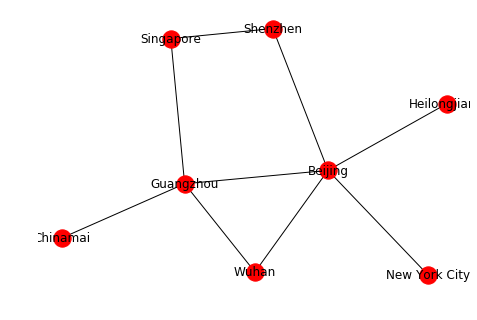

In [57]:
networkx.draw(air_route, with_labels=True)

In [61]:
def search_desitination(graph, start, destination):
    pathes = [[start]]
    seen = set()
    choose_pathes = []
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]
        if froniter in seen: continue
            
        for city in graph[froniter]:
            new_path = path + [city]
            pathes.append(new_path)
            if city == destination:return new_path
            
        seen.add(city)
    return choose_pathes

In [62]:
def draw_route(cities): return '✈️ ->'.join(cities)

In [63]:
draw_route(search_desitination(air_route, SZ, CM))

'Shenzhen✈️ ->Beijing✈️ ->Guangzhou✈️ ->Chinamai'